In [2]:
import numpy as np 
from scipy import misc    
import imageio # for loading image
import matplotlib.pyplot as plt

In [3]:
path ="faces"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path +"\\"+ prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path +"\\"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_6904\1198339575.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)
C:\Users\nnnam1\AppData\Local\Temp\ipykernel_6904\1198339575.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


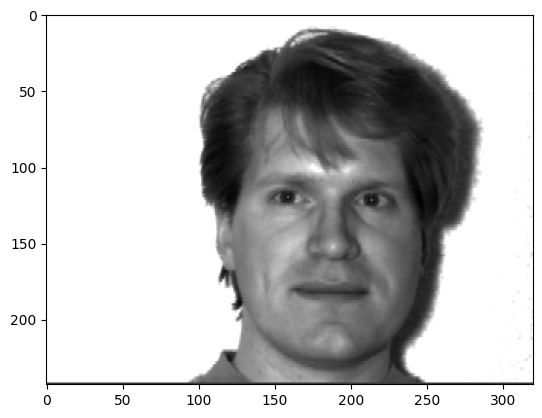

In [63]:
plt.imshow(im)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)

PCA(n_components=100)

In [ ]:
transform

In [7]:
pca.mean_.shape

(77760,)

In [14]:
U = pca.components_.T

In [15]:
U.shape

(77760, 100)

In [76]:
X_pca

array([[-7.79582754e+00+0.j, -1.06913296e+00+0.j, -1.50033211e+00+0.j,
        ..., -1.40913418e-01+0.j, -2.92133849e-02+0.j,
         1.00181551e-01+0.j],
       [-7.67776444e+00+0.j, -1.36530895e+00+0.j, -1.54911478e+00+0.j,
        ..., -1.57371554e-01+0.j, -4.41478620e-02+0.j,
         1.05057376e-01+0.j],
       [-7.59592064e+00+0.j, -1.50055275e+00+0.j, -1.47350542e+00+0.j,
        ..., -1.67078710e-01+0.j, -3.42402725e-02+0.j,
         1.41301866e-01+0.j],
       ...,
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j]])

In [36]:
X.T.mean(axis=0)

array([122.75757576, 123.50909091, 123.77575758, ...,  68.        ,
        68.        ,  68.        ])

In [33]:
pca.mean_[0]

122.75757575757575

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_14596\229419608.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)  #X


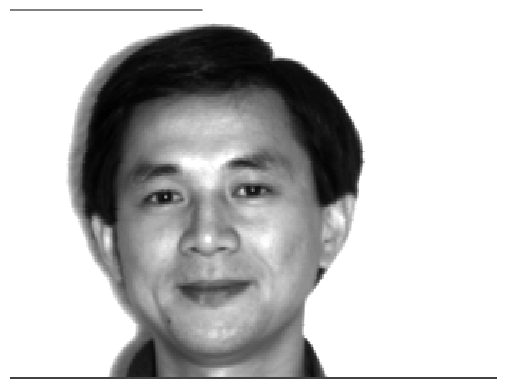

(100, 1)


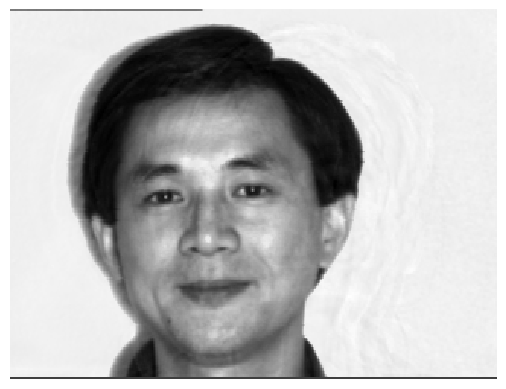

In [21]:
# for person_id in range(1, 7):
for state in ['centerlight']:
    fn = path+ "\\"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
    im = imageio.imread(fn)  #X
    plt.axis('off')
#         plt.imshow(im, interpolation='nearest' )
    f1 = plt.imshow(im, interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    fn = 'ori' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()
    # reshape and subtract mean, don't forget 
    x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)   # X -X_mean
    # encode
    z = U.T.dot(x) #
    print(z.shape)
    #decode
    x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

    # reshape to orginal dim
    im_tilde = x_tilde.reshape(243, 320)
    plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
    f1 = plt.imshow(im_tilde, interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    fn = 'res' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()

In [23]:
x_tilde.shape

(77760, 1)

In [25]:
im.shape

(243, 320)

In [26]:
x.shape

(77760, 1)

In [39]:
import numpy as np

def standardize_data(X):
    mean = np.mean(X, axis=0)
#     std_dev = np.std(X, axis=0)
    return X - mean

# def standardize_data(X):
#     mean = np.mean(X, axis=0)
#     std_dev = np.std(X, axis=0)
#     return (X - mean) / std_dev


def compute_covariance_matrix(X):
    return np.cov(X.T)

def PCA(X, n_components):
    # Step 1: Standardize the data
    X_std = standardize_data(X)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_std)
    
    # Step 3: Calculate eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvectors based on eigenvalues
    eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 5: Select top n_components eigenvectors to form the projection matrix
    projection_matrix = np.hstack([pair[1].reshape(-1, 1) for pair in eig_pairs[:n_components]])
    
    # Step 6: Transform the original dataset using the projection matrix
    return X_std @ projection_matrix

# Example usage
# X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
# n_components = 2

transformed_data = PCA(X, n_components)
print(transformed_data)


[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


In [34]:
import numpy as np

class MyPCA:

    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    @staticmethod
    def power_iteration(X, max_iter=100, tol=1e-6):
        v = np.random.rand(X.shape[1])
        v = v / np.linalg.norm(v)

        for _ in range(max_iter):
            u = X @ v
            u = u / np.linalg.norm(u)
            v_new = X.T @ u
            v_new = v_new / np.linalg.norm(v_new)

            if np.linalg.norm(v_new - v) < tol:
                print("converge")
                break

            v = v_new

        eig_val = u.T @ (X @ v)
        return eig_val, v

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
        X_std = X - self.mean

        eig_vals = []
        eig_vecs = []

        for _ in range(self.n_components):
            eig_val, eig_vec = self.power_iteration(X_std, self.max_iter, self.tol)
            eig_vals.append(eig_val)
            # Adjust the sign of the eigenvector if the first element is negative
#             if eig_vec[0] < 0:
#                 eig_vec = -eig_vec
            eig_vecs.append(eig_vec)

            X_std = X_std - (X_std @ eig_vec)[:, np.newaxis] * eig_vec[np.newaxis, :]

        eig_vecs = np.array(eig_vecs)

        self.components = eig_vecs

        # Explained variance ratio
        eig_vals_sum = np.sum(eig_vals)
        self.explained_variance_ratio = [i / eig_vals_sum for i in eig_vals]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean)
        X_proj = X_std.dot(self.components.T)

        return X_proj

# Example usage
my_pca = MyPCA(n_components=100).fit(X.T)

print('Components:\n', my_pca.components)


converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge


KeyboardInterrupt: 

In [19]:
import numpy as np

class MyPCA:

    def __init__(self, n_components, max_iter=1000, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.eig_vals = []

    @staticmethod
    def power_iteration(X, max_iter=1000, tol=1e-6):
        v = np.random.rand(X.shape[1])
        v = v / np.linalg.norm(v)

        for _ in range(max_iter):
            u = X @ v
            u = u / np.linalg.norm(u)
            v_new = X.T @ u
            v_new = v_new / np.linalg.norm(v_new)

            if np.linalg.norm(v_new - v) < tol:
                break

            v = v_new
#         if v[0] < 0:
#             v = -v
        eig_val = u.T @ (X @ v)

        # Adjust the sign of the eigenvector if the first element is negative


        return eig_val, v

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
        X_std = X - self.mean

        eig_vals = []
        eig_vecs = []

        for _ in range(self.n_components):
            eig_val, eig_vec = self.power_iteration(X_std, self.max_iter, self.tol)
            eig_vals.append(eig_val)
            eig_vecs.append(eig_vec)

            X_std = X_std - (X_std @ eig_vec)[:, np.newaxis] * eig_vec[np.newaxis, :]

        eig_vecs = np.array(eig_vecs)

        self.components = eig_vecs

        # Explained variance ratio
        eig_vals_sum = np.sum(eig_vals)
        self.explained_variance_ratio = [i / eig_vals_sum for i in eig_vals]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)
        self.eig_vals = eig_vals
        self.eig_vecs = eig_vecs
        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean)
        X_proj = X_std.dot(self.components.T)

        return X_proj

# Example usage
my_pca = MyPCA(n_components=100).fit(X.T)

print('Components:\n', my_pca.components)


Components:
 [[ 3.64754122e-04  5.91616849e-04  6.96819746e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.07381230e-03  1.24774532e-03  1.28800191e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.09857380e-04  1.08118971e-04  1.18442373e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 9.18879809e-04  1.93561631e-04 -2.31603623e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.04744092e-03  1.05116224e-03  1.06374504e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.22827976e-05 -2.98983446e-04  2.23265622e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [23]:
eig_vecs = my_pca.eig_vecs
eig_vals = my_pca.eig_vals

In [31]:
components = eig_vecs_sorted[:100,:]

In [33]:
components.shape

(100, 100)

In [28]:
eig_vecs.shape

(100, 77760)

In [29]:
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[1])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

In [22]:
my_pca.eig_vecs

array([[ 3.64754122e-04,  5.91616849e-04,  6.96819746e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.07381230e-03,  1.24774532e-03,  1.28800191e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.09857380e-04,  1.08118971e-04,  1.18442373e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.18879809e-04,  1.93561631e-04, -2.31603623e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.04744092e-03,  1.05116224e-03,  1.06374504e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.22827976e-05, -2.98983446e-04,  2.23265622e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [21]:
my_pca.eig_vals

[131108.9851744422,
 88901.29078810348,
 70653.64290364938,
 64731.685692813866,
 51514.44604679594,
 48174.701304183254,
 39458.89366965728,
 36010.840718351435,
 35485.033991414864,
 -32310.921942428107,
 27527.890866288722,
 -25585.385454205698,
 22993.125348960646,
 22543.72564227631,
 22170.08952381815,
 21225.132948345243,
 20304.68910911423,
 -19230.32163701529,
 18738.22748030155,
 -18333.780301604398,
 17204.926555862603,
 -16529.960876982088,
 -15821.329637040468,
 15427.331183982324,
 14693.522263166431,
 14650.342825683098,
 13878.882377274811,
 13263.913949700838,
 13036.342396061129,
 -12543.851816644441,
 -12466.442031132066,
 -12162.171569587206,
 -11859.327432202927,
 11513.84624939403,
 -11350.913694153354,
 10941.07386746216,
 -10500.865279044603,
 -10301.358682484119,
 10208.006239487491,
 -10001.745265309142,
 9832.542957430109,
 9653.782955124156,
 9493.907043727779,
 -9326.793522023303,
 9191.060518433187,
 9076.976172615985,
 8905.47740312545,
 8725.187754396158

In [13]:
my_pca.explained_variance_ratio

[0.08837419953795235,
 0.059924042588205176,
 0.0476241893547005,
 0.043632485601453774,
 0.03472338625739785,
 0.032472226522627066,
 0.02659732388340106,
 0.024271180219855318,
 0.02392068796031684,
 0.021779223286620963,
 0.018555214328280417,
 0.01724586576868595,
 0.015498507370044387,
 0.015188502051460578,
 0.014950834621295622,
 0.014306831318482365,
 0.01368640482175946,
 0.012961980082251346,
 0.012630691844208699,
 0.01235798604267226,
 0.011597005336153866,
 0.011142043908199397,
 0.010664384041274,
 0.010398820483862767,
 0.009883745362671198,
 0.009895511080865269,
 0.009355080572807291,
 0.008940297679936855,
 0.008787423208478575,
 0.008454392204212376,
 0.008403820035175154,
 0.008173511903416471,
 0.008017683577998253,
 0.00776004440118591,
 0.007651967900305106,
 0.0073748466676073,
 0.007078018623896097,
 0.006937516417475537,
 0.006886901832941648,
 0.006702521681279,
 0.006666369030843272,
 0.006502219514037074,
 0.0064042295779127385,
 0.006286200784620525,
 0.00

In [15]:
pca.singular_values_

array([131108.98517451,  88901.29078809,  70653.64290377,  64731.68569263,
        51514.44604691,  48174.70130405,  39458.8936697 ,  36010.84071883,
        35485.03399091,  32310.92194237,  27527.89086632,  25585.38545418,
        22993.12534917,  22543.72564231,  22170.0895236 ,  21225.13294833,
        20304.68910907,  19230.3216371 ,  18738.22748028,  18333.78030139,
        17204.9265558 ,  16529.96087663,  15821.32963626,  15427.33118333,
        14693.52312161,  14650.34196741,  13878.88237544,  13263.91393429,
        13036.3423795 ,  12543.8518052 ,  12466.44201253,  12162.17150542,
        11859.32735381,  11513.84621254,  11350.9136165 ,  10941.07322618,
        10500.86496803,  10301.3580577 ,  10208.00566124,  10001.74330394,
         9832.54152516,   9653.7819598 ,   9493.90231338,   9326.7883328 ,
         9191.05376905,   9076.96851924,   8905.47284047,   8725.18180185,
         8701.77746813,   8529.80555267,   8442.51856273,   8336.46292798,
         8228.83437421,  

In [11]:
# from sklearn.preprocessing import StandardScaler
# X_std = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components = 100).fit(X.T)

print('Components:\n', pca.components_)
# print('Explained variance ratio:\n', pca.explained_variance_ratio_)

# cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print('Cumulative explained variance:\n', cum_explained_variance)

# X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
# print('Transformed data shape:', X_pca.shape)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
# plt.xlabel('PC1'); plt.xticks([])
# plt.ylabel('PC2'); plt.yticks([])
# plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
# plt.show()

Components:
 [[-3.64752681e-04 -5.91615175e-04 -6.96818017e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.07381255e-03 -1.24774588e-03 -1.28800259e-03 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.09851500e-04 -1.08113391e-04 -1.18437960e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-3.56929088e-04  2.65378252e-04  9.36964570e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.52462315e-03 -1.54644901e-03 -1.17995599e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.57437854e-05 -1.46394202e-04  1.85420518e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [13]:
pca.components_.T.shape

(77760, 100)

In [46]:
import numpy as np

class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
#         self.scale = np.std(X, axis=0)
#         X_std = (X - self.mean) / self.scale
        X_std = X - self.mean
        X_std = np.float32(X_std)

        # Eigendecomposition of covariance matrix
        cov_mat = np.cov(X_std.T,dtype=np.float32)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        # Adjusting the eigenvectors that are largest in absolute value to be positive
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.n_components, :]

        # Explained variance ratio
        self.explained_variance_ratio = [i / np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj

# Example usage
my_pca = MyPCA(n_components=100).fit(X.T)

print('Components:\n', my_pca.components)


MemoryError: Unable to allocate 22.5 GiB for an array with shape (77760, 77760) and data type float32

In [35]:
import numpy as np

class MyPCA:

    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    @staticmethod
    def power_iteration(A, max_iter=100, tol=1e-6):
        n = A.shape[0]
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)

        for _ in range(max_iter):
            w = A @ v
            v_new = w / np.linalg.norm(w)

            if np.linalg.norm(v_new - v) < tol:
                break

            v = v_new

        eig_val = v.T @ A @ v
        return eig_val, v

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
        X_std = X - self.mean

        # Compute covariance matrix
        cov_mat = np.cov(X_std.T)

        eig_vals = []
        eig_vecs = []

        for _ in range(self.n_components):
            eig_val, eig_vec = self.power_iteration(cov_mat, self.max_iter, self.tol)
            eig_vals.append(eig_val)

            # Adjust the sign of the eigenvector if the first element is negative
            if eig_vec[0] < 0:
                eig_vec = -eig_vec

            eig_vecs.append(eig_vec)

            # Deflate the covariance matrix
            cov_mat = cov_mat - eig_val * np.outer(eig_vec, eig_vec)

        eig_vecs = np.array(eig_vecs)

        self.components = eig_vecs

        # Explained variance ratio
        eig_vals_sum = np.sum(eig_vals)
        self.explained_variance_ratio = [i / eig_vals_sum for i in eig_vals]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean)
        X_proj = X_std.dot(self.components.T)

        return X_proj

# Example usage
my_pca = MyPCA(n_components=100).fit(X.T)

print('Components:\n', my_pca.components)
 

MemoryError: Unable to allocate 45.1 GiB for an array with shape (77760, 77760) and data type float64

In [ ]:
my_pca.components.T.shape

In [ ]:
pca.components_

In [44]:
np.sum(np.array(my_pca.components)+np.array(pca.components_),axis=0).sum()/my_pca.components.shape[1]

0.00881994934084329

77760